#### 2.4 指数家族

迄今为止，我们在本章研究的概率分布（除了混合高斯）都是被称为指数家族这个广阔分布中的特例（Duda和Hart，1973年；Bernardo和Smith，1994年）。指数家族的成员有着许多重要的性质，在很多应用中，对这些的讨论都很有启发性的。

在$\mathbf{x}$上的指数架子分布，给定参数$\mathbf{\eta}$，定义成分布集合的形式

$$p(\mathbf{x} \mid \mathbf{\eta}) = h(\mathbf{x})g(\mathbf{\eta})\text{exp}\{\mathbf{\eta}^T\mathbf{u}(\mathbf{x})\}$$

这里$\mathbf{x}$可能是常量，或向量，可能是离散或连续值。这里$\mathbf{\eta}$被恒做分布的自然参数，$\mathbf{u}(\mathbf{x})$是$\mathbf{x}$的函数。函数$g(\mathbf{\eta})$可以解释为参数，以确保分布是标准化的，因此它满足

$$g(\mathbf{\eta})\int h(\mathbf{x})\text{exp}\{\mathbf{\eta}^T\mathbf{u}(\mathbf{x})\}d\mathbf{x} = 1$$

其中，如果$\mathbf{x}$是离散变量，积分被加和取代。

我们开始取一些之前分布的例子来介绍，实施航显示它们都是指数家族的成员。考虑之前的二项分布

$$p(x \mid \mu) = \text{Bern}(x \mid \mu) = \mu^x(1-\mu)^{1-x}$$

表达右边指数项中对数，我们有

$$\begin{align*}
p(x \mid \mu) &= \text{exp}\{x\ln\mu + (1-x)\ln(1-\mu)\} \\
&= (1-\mu)\text{exp}\left\{\ln\left(\frac{\mu}{1-\mu}\right)x\right\}
\end{align*}$$

与2.194相比，我们有

$$\eta = \ln\left(\frac{\mu}{1-\mu}\right)$$

这里，我们可以给出$\mu=\sigma(\eta)$对$\mu$的求解，有

$$\sigma(\eta)=\frac{1}{1+\text{exp}(-\eta)}$$

这也叫做逻辑sigmoid函数。因此我们可以使用标准表示2.194写出二项分布的形式

$$p(x \mid \eta) = \sigma(-\eta)\text{exp}(\eta x)$$

其中我们有$1-\sigma(\eta)=\sigma(-\eta)$，这很容易从2.199中证明得到。相比2.194，则有

$$u(x) = x$$

$$h(x) = 1$$

$$g(\eta) = \sigma(-\eta)$$

接下来考虑多远分部，对于单个观测值$\mathbf{x}$，取如下形式

$$p(\mathbf{x} \mid \mathbf{\mu}) = \prod_{k=1}^M\mu^{x_k} = \text{exp}\left\{\sum_{k=1}^Mx_k\ln\mu_k\right\}$$

其中$\mathbf{x} = (x_1, \cdots, x_k)$。我们可以可以写出2.194的标准化表示，我们有

$$p(\mathbf{x} \mid \mathbf{\eta}) = \text{exp}(\mathbf{\eta}^T\mathbf{x})$$

其中$\eta_k = \ln\mu_k$，我们定义$\mathbf{\eta} = (\eta_1, \cdots, \eta_M)^T$。与2.194相比我们有

$$\mathbf{u}(\mathbf{x}) = \mathbf{x}$$

$$h(\mathbf{x}) = 1$$

$$g(\mathbf{\eta}) = 1$$

需要注意的是参数$\eta_k$是相关的，因为参数$\eta_k$满足

$$\sum_{k=1}^M\mu_k = 1$$

所以，给定任何$M-1$个参数$\mu_k$，剩余的参数是固定的。在某些情况，很方便就可以删除这些条件，而就只使用$M-1$个参数来表示分布。这可以通过它们之间的关系2.209来评估$\mu_M$，而只使用剩余${\mu_k}$，其中$k=1,\cdots,M-1$项来表示，因此剩下$M-1$个参数。需要注意的是这些剩余参数仍然满足条件

$$0 \le \mu_k \le 1, \hspace{0.5cm} \sum_{k=1}^{M-1}\mu_k \le 1$$

使用条件2.209，在这个表达中多元分布会变成

$$\begin{align*}
&\text{exp}\left\{\sum_{k=1}^Mx_k\ln\mu_k\right\} \\
&=\text{exp}\left\{\sum_{k=1}^{M-1}x_k\ln\mu_k + \left(1-\sum_{k=1}^{M-1}x_k\right)\ln\left(1-\sum_{k=1}^{M-1}\mu_k\right)\right\} \\
&=\text{exp}\left\{\sum_{k=1}^{M-1}x_k\ln\left(\frac{\mu_k}{1-\sum_{j=1}^{M-1}\mu_j}\right) + \ln\left(1-\sum_{k=1}^{M-1}\mu_k\right)\right\}
\end{align*}$$

我们现在得到

$$\ln\left(\frac{\mu_k}{1-\sum_j\mu_j}\right)=\eta_k$$

首先，我们可以通过在$k$的两边求和，然后整合得到$\mu_k$的解

$$\mu_k = \frac{\text{exp}(\eta_k)}{1+\sum_j\text{exp}(\eta_j)}$$

这被称作softmax函数，或标准化指数。在这个表达式中，多元分布可以取如下形式

$$p(\mathbf{x} \mid \mathbf{\eta}) = \left(1+\sum_{k=1}^{M-1}\text{exp}(\eta_k)\right)^{-1}\text{exp}(\mathbf{\eta}^T\mathbf{x})$$

这是指数家族的标准化形式，参数向量$\mathbf{\eta}=(\eta_1,\cdots,\eta_{M-1})^T$有如下

$$\mathbf{u}(\mathbf{x})=\mathbf{x}$$

$$h(\mathbf{x})=1$$

$$g(\mathbf{\eta})=\left(1+\sum_{k=1}^{M-1}\text{exp}(\eta_k)^{-1}\right)$$

最后，让我们考虑高斯分布。对于单变量高斯，我们有

$$\begin{align*}
p(x\mid\mu,\sigma^2)
&=\frac{1}{(2\pi\sigma^2)^{1/2}}\text{exp}\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\} \\
&=\frac{1}{(2\pi\sigma^2)^{1/2}}\text{exp}\left\{-\frac{1}{2\sigma^2}x^2 + \frac{\mu}{\sigma^2}x - \frac{1}{2\sigma^2}\mu^2\right\}
\end{align*}$$

其中，在简单整合后，可以表示成标准化指数家族形式2.194有

$$\mathbf{\eta} = 
\begin{pmatrix}
\mu/\sigma^2 \\
-1/2\sigma^2
\end{pmatrix}$$

$$\mathbf{u}(x) =
\begin{pmatrix}
x \\
x^2
\end{pmatrix}
$$

$$h(\mathbf{x}) = (2\pi)^{-1/2}$$

$$g(\mathbf{\eta}) = (-2\eta_2)^{1/2}\text{exp}\left(\frac{\eta_1^2}{4\eta_2}\right)$$

#### 2.4.1 最大似然和充分统计

让我们先考虑使用最大似然对参数向量$\mathbf{\eta}$在一般的指数家族1.194中的评估问题。对两边求梯度2.195以$\mathbf{\eta}$来表示，我们有

$$\nabla g(\mathbf{\eta})\int h(\mathbf{x})\text{exp}\{\mathbf{\eta}^T\mathbf{u}(\mathbf{x})\}d\mathbf{\mathbf{x}} + g(\mathbf{\eta})\int h(\mathbf{x})\text{exp}\{\mathbf{\eta}^T\mathbf{u}(\mathbf{x})\}\mathbf{u}(\mathbf{x})d\mathbf{\mathbf{x}}=0$$

整理一下，我们再次使用2.195，那么有

$$-\frac{1}{g(\mathbf{\eta})}\nabla g(\mathbf{\eta}) = g(\mathbf{\eta})\int h(\mathbf{x})\text{exp}\{\mathbf{\eta}^T\mathbf{u}(\mathbf{x})\}\mathbf{u}(\mathbf{x})d\mathbf{x}=\mathbb{E}[\mathbf{u}(\mathbf{x})]$$

其中我们使用了2.194。我们因此会有结果

$$-\nabla \ln g(\mathbf{\eta}) g(\mathbf{\eta}) = \mathbb{E}[\mathbf{u}(\mathbf{x})]$$

需要注意的是协方差$\mathbf{u}(\mathbf{x})$可以由$g(\mathbf{\eta})$的二阶导得到，更高阶的也类似。因此，提供来自指数家族，我们标准化的分布，我们可以通过简单的查分找到它的不同。

现在考虑一个独立同分布数据集表示成$\mathbf{X} = \{\mathbf{x}_1,\cdots,\mathbf{x}_n\}$，似然函数如下

$$p(\mathbf{X} \mid \mathbf{\eta}) = \left(\prod_{n=1}^Nh(\mathbf{x}_n)\right)g(\mathbf{\eta})^N\text{exp}\left\{\mathbf{\eta}^T\sum_{n=1}^N\mathbf{u}(\mathbf{x})_n\right\}$$

对$\ln p(\mathbf{X} \mid \mathbf{\eta})$求$\mathbf{\eta}$的梯度，令其为0，我们得到下面的满足最大似然评估$\mathbf{\eta}_{\text{ML}}$的情形

$$-\nabla \ln g(\mathbf{\eta}_{\text{ML}}) = \frac{1}{N}\sum_{n=1}^N\mathbf{u}(\mathbf{x}_n)$$

原则上，可以解得$\mathbf{\eta}_{\text{ML}}$。我们看到依赖于数据的最大似然评估，只是与$\sum_n\mathbf{u}(\mathbf{x}_n)$相关，这因此也被称为分布2.194的充分统计。我们并不需要存在整个数据集，只是充分统计值。对于伯努利分布，例如，函数$\mathbf{u}(x)$只是由$x$给出的，所以我们需要将所有的数据点$\{x_n\}$加起来，而对于高斯分布$\mathbf{u}(\mathbf{x})=(x,x^2)^T$，我们需要$\{x_n\}$的和，和$\{x_n^2\}$的和。

如果我们考虑极限$N \to ∞$，那么2.228右边部分会变成$\mathbb{E}[\mathbf{u}(\mathbf{x})]$，所以与2.226相比，我们看到在这个极限$\mathbf{\eta}_{\text{ML}}$将等价于真实的$\mathbf{\eta}$值。

事实上，这个充分特征对于贝叶斯推断来说也成立，但是我们将推迟到第8张讨论这些内容，当我们学习了图模型后，可以以一个更加深入的视野来看待这些内容。

#### 2.4.2 共轭先验

先前我们已经多次涉及共轭先验的内容，从伯努利分布的内容的例子中（共轭先验是beta分布），或高斯（其中共轭先验的均值也是高斯，共轭先验的精度是Wishart分布）。一般来说，对于一个高斯分布$p(\mathbf{x} \mid \mathbf{\eta})$，我们可以找到一个先验$p(\mathbf{\eta})$是与似然函数共轭的，所以后验分布有着与先验分布同样的功能形式。对于任何指数家族2.194的成员，存在一个共轭先验可以写作如下形式

$$p(\mathbf{\eta} \mid \mathcal{X}, \mathbf{v}) = f(\mathcal{X}, \mathbf{v})g(\mathbf{\eta})^{\mathbf{v}}\text{exp}\{\mathbf{v}\mathbf{\eta}^T\mathcal{X}\}$$

其中$f(\mathcal{X}, \mathbf{v})g(\mathbf{\eta})$是一个标准化的系数，$g(\mathbf{\eta})$是与2.194出现的同样的函数。为了看到它确实是共轭的，让我们对似然函数2.227乘以先验2.229得到后验分布，更新到一个标准化系数，形式如下

$$p(\mathbf{\eta} \mid \mathbf{X}, \mathcal{X}, \mathcal{v}) \propto g(\mathbf{\eta}^{\mathcal{v} + N})\text{exp}\left\{\mathbf{\eta}^T\left(\sum_{n=1}^N\mathbf{u}(\mathbf{x}_n) + \mathcal{v}\mathcal{X}\right)\right\}$$

合理可以再次去如先验2.229一样的功能形式，确认为是共轭的。此外，我们看到参数$\mathcal{v}$可以解释为是一个在县严重有效预观测值的数量，每个都是由$\mathcal{X}$给出的充分统计$\mathbf{u}(\mathbf{x})$的值。

#### 2.4.3 非形式化先验

在一些概率推断的应用中，我们有先验知识的就会很方便通过先验分布来表达。比如，如果有些值在先验中被分配了0概率，那么对于任何后续非相关的观测数据的后验分布也有必要分配0概率给那些值。在许多例子中，尽管，我们可能只知道很少关于取何种分布的想法。我们应该找到一个先验分布的形式，称为非形式化先验，它的目的就是尽量少地影响后验分布（Jeffries，1946年；Box和Tao，1973年；Bernardo和Smith，1994年）。这有时候被称作"让数据自己说话"。

如果我们有一个由参数$\lambda$控制的分布$p(x \mid \lambda)$，我们可能会设置一个先验分布$p(\lambda)=\text{const}$作为合适的先验。如果$\lambda$是有着$K$个状态的离散值，最简单的设置每个状态的先验概率为$1/K$。在连续参数的例子中，这种方法会有两个潜在的难点。第一是，如果$\lambda$的定义域过界了，这个先验分布就不能正确地标准化，因为积分在$\lambda$上的发散。这样的先验被称为不适当的。实际上，不恰当的先验一般用来提供的后验分布缺失合适的，比如，这可以被正确标准化，比如，如果我们取一个高斯均值上的均匀先验分布，那么均值的后验分布，一旦我们观测到至少一个数据点后，它就是合理的。

第二个困难来自概率密度在非线性变量变更下的转换行为，由1.27给出。如果函数$h(\lambda)$是一个常量，那么我们将变量改为$\lambda=\eta^2$，那么$\hat{h}(\eta)=h(\eta^2)$仍然是常量。尽管，如果我们选择密度$p_{\lambda}(\lambda)$是常量，那么$\eta$的密度由1.27给出，如下

$$p_{\eta}(\eta) = p_{\lambda}(\lambda)\Bigr|\frac{d\lambda}{d\eta}\Bigr| = p_{\lambda}(\eta^2)2\eta \propto \eta$$

所以$\eta$上的密度不再是常量。当我们使用最大似然的时候，这个问题就不会有，因为似然函数$p(x \mid \lambda)$是$\lambda$的简单函数，所以我们可以很容易使用任何方便的参数化。如果，我们选择一个分布是常量，我们必须认真地使用一个合适的参数表达。

这里我们考虑两个非形式化先验的例子（Berger，1985年）。首先，如果分布取如下形式

$$p(x \mid \mu) = f(x-\mu)$$

那么参数$\mu$被称为本地参数。这个家族的密度表现出平移不变形，因为如果我们平移$x$一个常量到$\hat{x}=x+c$，那么

$$p(\hat{x} \mid \hat{\mu}) = f(\hat{x} - \hat{\mu})$$

其中我们定义$\hat{\mu}=\mu+c$。因此，对于新变量，密度取与原始那个一样的形式，所以密度选择与原始无关。我们应该选择一个先验分布可以反映这种平移不变形，所以我们选择一个先验，它将等概论质量分配给区间$A \le \mu \le B$，和平移区间$A-c \le \mu \le B-c$。如下

$$\int_A^Bp(\mu)d\mu = \int_{A-c}^{B-c}p(\mu)d\mu = \int_A^Bp(\mu-c)d\mu$$

因为这对于所有选择的$A$和$B$都成立，我们有

$$p(\mu-c) = p(\mu)$$

这意味着$p(\mu)$是常量。一个本地参数的例子就是高斯分布的均值$\mu$。如我们看到的，在这个例子中，$\mu$的共轭先验分布是一个高斯$p(\mu \mid \mu_0, \sigma_0^2) = \mathcal{N}(\mu \mid \mu_0, \sigma_0^2)$，我们通过去极限$\sigma_0^2 \to ∞$，得到非形式化先验。事实上，从2.141和2.142，我们看到给出了$\mu$的后验分布，来自于先验消失的贡献。

作为第二个例子，考虑一个密度的如下形式

$$p(x \mid \sigma) = \frac{1}{\sigma}f(\frac{x}{\sigma})$$

其中$\sigma > 0$。需要注意的是如果$f(x)$是正确标准化的，这将是一个标准化的密度。参数$\sigma$被称为是缩放参数，密度显示了缩放不变形，如果我们对$x$缩放一个常量，有$\hat{x} = cx$，那么

$$p(\hat{x} \mid \hat{\sigma}) = \frac{1}{\sigma^2}f\left(\frac{\hat{x}}{\hat{\sigma}}\right)$$

其中我们定义$\hat{\sigma}=c\sigma$。这种转变对应着一种缩放变化，比如，如果$x$表示的是长度，那么从米到千米，我们希望选择一个先验分布可以反映这种缩放不变性。如果我们考虑区间$A \le \sigma \le B$，一个缩放的区间$A/c \le \sigma \le B/c$，那么先验应该分配等概论质量到这两个区间。因此我们有

$$\int_B^Ap(\sigma)d\sigma = \int_{A/c}^{B/c}p(\sigma)d\sigma = \int_A^Bp\left(\frac{1}{c}\sigma\right)\frac{1}{c}d\sigma$$

因为这对于选择的$A$和$B$，是一定成立的，我们有

$$p(\sigma)=p\left(\frac{1}{c}\sigma\right)\frac{1}{c}$$

因此$p(\sigma) \propto 1/\sigma$。需要注意是这还是一个不合适的先验，因为分布的积分是在$0 \le \sigma \le ∞$是发散的。有时很方便就可以想到缩放参数在对数参数密度项中的先验分布。使用1.27密度的转换规则，我们看到$p(\ln\sigma)=\text{const}$。因此，对于先验分布，区间$1 \le \sigma \le 10$的概率质量是与在区间$10 \le \sigma \le 100$和在$100 \le \sigma \le 1000$上式一样的。

在考虑了位置参数$\mu$之后，缩放参数的例子是高斯分布的标准差$\sigma$，因为

$$\mathcal{N}(x \mid \mu, \sigma^2) \propto \sigma^{-1}\text{exp}\{-(\tilde{x}/\sigma^2)\}$$

其中$\tilde{x} = x - \mu$。正如早些时候讨论的，使用精度$\lambda=1/\sigma^2$要比$\sigma$本身方便很多。使用密度的转换规则，我们看到分布$p(\sigma) \propto 1/\sigma$对应分布的参数$\lambda$形式$p(\lambda) \propto 1/\lambda$。我们见到$\lambda$的共轭先验是2.146给出的gamma分布$\text{Gam}(\lambda \mid a_0, b_0)$。非形式化先验是作为一个特殊例子$a_0=b_0=0$中得到的。如果我们再次测试后验分布$\lambda$的结果2.150和2.151，我们看到对于$a_0=b_0=0$，后验只依赖于数据的产生，而不是先验。

#### 2.5 非参数化方法

纵览本章，我们聚焦于使用的概率分布，是有着特定功能形式是由少量确定数据集的参数控制的。这被称为参数法密度建模。这个方法的一个重要限制是选择的密度可能是一个很差生成数据的分布模型，其结果的预测性能也会很差。比如，如果生成的数据是多元的，那么使用高斯并不能捕捉分布的各个方面，它必须是非单峰的。

在这最后一节，我们考虑一些非参数方法来评估参数，它对分布形式的假设很少。这里我们将大部分专注于简单频率方法。读者应该意识到，尽管，非参数贝叶斯方法能够引起很大的兴趣（Walker等人，1999年；Neal，2000年; M¨uller和Quintana，2004年; Teh等人，2006年）。

让我们以密度评估的直方图方法为开始进行讨论，我们已经在图1.11的边缘和条件分布内容里涉及过，图2.6中的中心极限定理的内容。这里我们会详细探索直方图密度模型的性质，我们会专注于与单个连续变量$x$的例子。标准直方图会简单地将$x$分成宽度为$\Delta_i$的区块bins，那么落在每个bin$i$中的观测值$x$的数量为$n_i$。为了将这个数目转换成标准化概率分布，我们简单地划分这总共$N$个观测值，通过宽度为$\Delta_i$的bins得到每个bin的概率值如下给出

$$p_i = \frac{n_i}{N\Delta_i}$$

从这我们很容易看到$\int p(x)dx = 1$。这给出了密度$p(x)$的模型，它是在每个bin宽度上的常量，一般bins有选择有同样的宽度$\Delta_i = \Delta$。

如图2.24，我们现实了一个直方密度评估的例子。这里的数据采样自分布，相应的绿色曲线，它的形式是两个混合高斯。同样也显示了三个密度评估直方图，其相应的是不同bin宽度$\Delta$的选择。我们可以看到$\Delta$很小的时候（上图），密度模型的结果是非常不平坦的，有很多出现在分布以下的结构并没有生成数据集。反过来，如果$\Delta$太大（底图），那么模型的结果会太平滑，因此也不能捕捉绿色双峰的特性。最佳的结果得到$\Delta$的一些中间值（中图）。原则上，一个脂肪密度模型是与bins的边界位置选择相关的，尽管与$\Delta$值相比，通常不太重要。

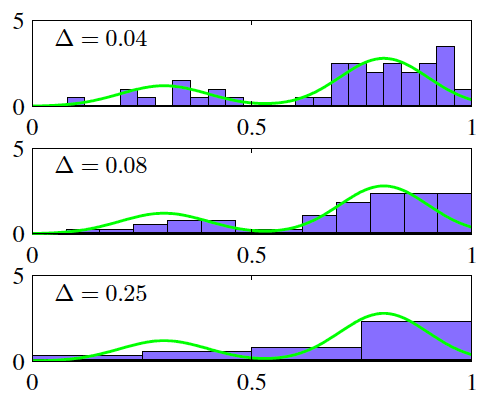

<center>如图2.24 图中绘制的是密度评估的直方图方法，它是从绿色曲线分布中生成的50个数据点的数据集的表示。直方图魔都评估，基于2.241，通常有一个bin狂赌$\Delta$显示的各种$\Delta$值。</center>

需要注意的是直方图方法有这样的性质（不像一会儿我们要讨论的方法），一旦计算了直方图，数据集本身就可以丢掉了，如果数据集很大的话，这种方法就很有优势。同时，如果数据点是序列化增加的，使用直方图方法也很容易应用。

实际上，直方图技术对于快速获取一维或二维数据的可视化很有用，而对于大多数的密度评估来说可能是没用的。一个很明显的问题就是对于密度评估的不连续的的，需要的是bins的边缘，而不是在分布下的任何性质来生成数据。另一个主要的限制就是直方图方法，就是它的维度缩放。如果我们将$D$维空间中的每个变量划分成$M$bins，那么bins的总量为$M^D$。这个$D$的指数级缩放就是维度爆炸的例子。在更高维度，提供有意义的局部概率密度所需的数据量也是惊人的。

直方图方法的密度评估所做的，教会我们两个重要的知识。第一，要在一个特殊位置评估概率密度，我们应该考虑一些本地近邻的数据点。需要注意的是，局部性的概念需要我们假设某种形式的距离，这里我们就假设欧几里得距离。对于直方图，近邻性质是由bins定义的，就会有一个自然平滑参数来描述本地区域的空间扩展，在这个例子中，就是bin的宽度。第二，为了获得一个好的结果，平滑参数的值应该是要么太大，要么太小。这会让人联想起在第一章中多项式曲线拟合中讨论的复杂模型的选择，其中多项式自由度$M$，或正则化参数$\alpha$，对于某些最优的中间值，既不太大，也不太小。利用这些想法，我们现在转向两个更广泛的密度评估非参数技术的讨论，核评估器和最近邻，它们已经比简单的直方图模型要更好地适应与维度的缩放了。

#### 2.5.1 核密度估计

让我们假设观测值是从一些$D$维空间的未知概率密度$p(\mathbf{x})$从生成的，这里我们取欧几里得，我们希望评估$p(\mathbf{x})$值。从早些时候的局部性讨论，让我们考虑一些包含$\mathbf{x}$的区域$\mathcal{R}$。关联到这个区域概率质量给出如下

$$P = \int_{\mathcal{R}}p(\mathbf{x})d\mathbf{x}$$

现在假设我们已经收集了包含$N$个采样自$p(\mathbf{x})$的观测值的数据集。因为每个书店都有概率$P$是落在$\mathcal{R}$内，在$\mathcal{R}$内的共$K$个数据点将根据二项分布来分布

$$\text{Bin}(K \mid N, P) = \frac{N!}{K!(N-K)!}P^K(1-P)^{1-K}$$

使用2.11，我们看到落在区域内的数据点的均值分数为$\mathbb{E}[K/N]=P$，类似地使用2.12，我们看到在这个均值附近的方差为$\text{var}[K/N]=P(1-P)/N$。对于大的$N$，这种分布将很快到达在均值附近的极值点，所以

$$K \simeq NP$$

如果，我们假设区域$\mathcal{R}$是足够小的，概率密度$p(\mathbf{x})$是在区域上几乎是常量，那么我们有

$$P \simeq p(\mathbf{x})V$$

这里的$V$是$\mathcal{R}$的容量，将2.244和2.245相结合，我们得到密度评估的形式

$$p(\mathbf{x}) = \frac{K}{NV}$$

需要注意的是2.246的合法性依赖于两个矛盾假设，即区域$\mathcal{R}$是足够小，密度是在区域上大致恒定，密度足够大（相对于密度的值）落入该区域内的数量$K$足以二项分布的急剧攀升。

我们可以以两种方式来使用2.246这个结果。要么我们可以固定住$K$，从数据中定义$V$的值，这就产生了K近邻技术，我们稍后讨论，要么我们可以固定住$V$，从数据中求解$K$，就产生了核方法。可以证明$K$近邻和核密度估计，在极限$N \to ∞$，提供的$V$适当地随$N$收缩，而$K$随$N$增长时，收敛至真实概率密度（Duda和Hart，1973）。

现在我们开始详细讨论核方法，开始我们取区域$\mathcal{R}$的一个超小的超立方体，我们希望找到它中心点$\mathbf{x}$额概率密度。为了计算落在这个区域内的$K$数量，很方便定义如下函数

$$k(\mathbf{u})=
\begin{cases}
1, & |u_i| \le 1/2, \hspace{0.5cm} i=1,\cdots,D \\
0, & \text{otherwise}
\end{cases}$$

这代表了一个以原点为中心的单位立方体。函数$k(\mathbf{u})$是一个核函数的例子，在这里也称作Parzen窗口。从2.247中，如果数据点$\mathbf{x}_n$位于以$\mathbf{x}$为中心，边为$h$的立方体内，则数量$k((\mathbf{x}-\mathbf{x}_n)/h)$为1，否则为0。所有数据点在这个立方体内的数量，因此有

$$K = \sum_{n=1}^Nk\left(\frac{\mathbf{x}-\mathbf{x}_n}{h}\right)$$

将这个表达式带入到2.246，则有如下$\mathbf{x}$的密度估计结果

$$p(\mathbf{x}) = \frac{1}{N}\sum_{n=1}^N\frac{1}{h^D}k\left(\frac{\mathbf{x}-\mathbf{x}_n}{h}\right)$$

其中我们用$V = h^D$表示，边为$h$，$D$维空间中超立方体的体积。使用函数$k(\mathbf{u})$的对称性，我们现在可以重新解释这个等式，不是以$\mathbf{x}$为中心的单个立方体，而是以$N$个数据点$\mathbf{x}_n$为中心的所有立方体的总和。

就目前而言，2.249核密度估计会遭受与直方图方法同样的问题，就是认为定义的不连续性，在这个例子中就是立方体的边界，如果我们选择一个很平滑的核函数，就可以得到一个平滑的密度模型，一般的选择时高斯，它产生了下面的核密度模型

$$p(\mathbf{x}) = \frac{1}{N}\sum_{n=1}^N\frac{1}{(2\pi h^2)^{1/2}}\text{exp}\left\{-\frac{\|\mathbf{x}-\mathbf{x}_n\|^2}{2h^2}\right\}$$

其中$h$表示的是高斯组成的标准方差。因此我们的密度模型是假设所有数据点都是在这个高斯上的，将所有数据集加在一起，然后再除以$N$使得密度被正确归一化。图2.25，我们英语模型2.250到早些直方图技术演示的的数据集。我们看到，如期望，参数$h$起着平滑性参数的作用，在较小$h$的噪声敏感和较大$h$的超平滑之间有一个平衡。同样，在模型复杂度上，$h$的优化是一个问题，类似于直方图密度估计的bin宽度的选择，或是多项式曲线拟合中的自由度的选择。

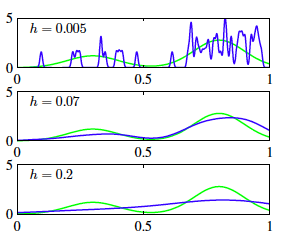

<center>图2.25 图中画的是之前演示直方图方法2.24中所使用的数据集对应的核密度模型。我们看到$h$作为一个平滑参数，如果设置的很小（最上面），结果是一个拥有噪声的密度模型，如果设置的过大（最底部），那么从中产生数据的基础分部的双峰性质（绿色曲线显示）就会消失。最佳密度模型的中间值$h$（中间那个）。</center>

我们可以选择任何的2.249中的核函数$k(\mathbf{u})$设定如下约束

$$k(\mathbf{u}) \ge 0$$

$$\int k(\mathbf{u})d\mathbf{u} = 1$$

它确保了概率分布的结果是处处非负的，而且积分为2.249给出的密度模型的类别称作核密度估计，或Parzen估计。它由一个很大的优点，就是没有训练阶段，因为这个阶段需要存储大量的训练集。但是，它也有一个最大的缺点，就是密度评估的计算量会随着数据集的增长而线性增长。

#### 2.5.2 最近邻方法

核方法的一个难点就是控制核宽度的参数$h$对于所有核来说都是固定的。在数据密度高的区域，较大的$h$值会导致过度平滑，和从数据中抽取的结构消失。然而，减小$h$可能导致数据空间中到处是噪声估计，这时的密度会过小，因此，最优的$h$选择可能提来与数据空间中的位置。这个问题可以通过密度估计的最近邻方法来解决。

因此，我们回到2.246本地密度估计的通用结果，代替固定$V$，从数据中求解$K$值的是，我们考虑固定$K$值，使用数据来查找相应的$V$值。为了做到这，我们考虑一个以$\mathbf{x}$为中心的很小的球体，我们希望以此评估密度$p(\mathbf{x})$，我们也允许球的半径可以增长知道它确实包含$K$个数据点。密度$p(\mathbf{x})$的估计是由2.246给出的，$V$设置成球的体积。这个技术也被称为$K$近邻，如图2.26所示，对于参数$K$的各种选择，使用图2.24和2.25同样的数据集。我们看到$K$值现在控制着平滑度，同样也会有一个对$K$的最优选择，要么是太大，或太小。需要注意的是$K$近邻产生的模型并不是真实密度模型，因为在所有空间的积分会发散。

我们就以密度估计的$K$近邻技术是怎样扩展到分类问题来结束本章。为了这样做，我们应用$K$近邻密度估计到每个独立类别，然后使用贝叶斯定理。让我们假设我们有一个类别为$\mathcal{C}_k$，相应数量为$N_k$数据点，总量为$N$的数据集，所以有$\sum_kN_k = N$。如果希望对一个新点$\mathbf{x}$分类，我们画一个以$\mathbf{x}$为中心的包含$K$个非相关类别的球体。假设这个球体有体积$V$，包含$K_k$个数据点的类别$\mathcal{C_k}$。那么2.246提供了一个相关类别的密度评估

$$p(\mathbf{x} \mid \mathcal{C}_k) = \frac{K_k}{N_kV}$$

类似地，无条件密度如下

$$p(\mathbf{x} \mid \mathcal{C}) = \frac{K}{NV}$$

而类别先验给出如下

$$p(\mathcal{C}_k) = \frac{N_k}{N}$$

我们现在将2.253，2.254和2.255结合起来，使用贝叶斯定理来得到类成员的后验概率

$$p(\mathcal{C}_k \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid \mathcal{C}_k)(\mathcal{C}_k)}{p(\mathbf{x})} = \frac{K_k}{K}$$

如果我们希望最小化误分类概率，这个只要将测试点$\mathbf{x}$分配给有着最大后验概率的类别，相应的最大值$K_k/K$。因此未来能够分类新的数据点，我们从训练数据集中识别$K$个近邻，然后将新的数据点分配给在这些集合中有着最大数目代表的类别。戒条可以随机打破。一个特殊例子$K=1$称作近邻规则，因为测试点可以很简单地分配给来自训练集中最近的点的同类别。这些内容如图2.27所示。

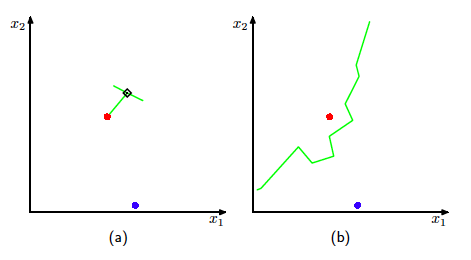

<center>图2.27 (a)在$K$近邻分类中，一个新数据点，以黑色菱形框表示，它的分类是根据$K$最近训练数据点的主类别成员，在本例中$K=3$。(b) 在近邻（$K=1$）方法分类中，由此产生的决策边界由差平面组成，这些超平面形成来自不同类别点对的垂直平分线。</center>

如图2.28，我们展示的如第一章介绍的，对于各种$K$值，应用$K$近邻算法到原油数据的结果。如期望所示，我们看到$K$控制着平滑度，所以较小的$K$产生各自类别的许多小区域，而较大$K$则导致更少的区域。

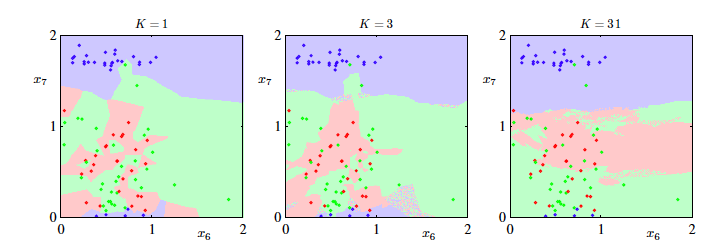

<center>图2.28 图中画的是从原油数据集的200各数据点的$x_6$相对于$x_7$的值，这里红色，绿色，和蓝色相应的是"层级","环形","同质"类别。同时也展示了由$K$近邻算法给出的各种$K$值的输入空间的分类。</center>

一个有趣的最近邻$(K=1)$分类的性质是，在极限$N \to ∞$，错误率绝不会超过最佳分类器的最小可实现错误率的两倍，即，使用真实类分布的那个（Cover和Hart，1967年）。

如上所述，$K$近邻方法，和核密度估计，都需要存储整个训练数据集，如果数据集过大，这会导致大量的计算。通过构造基于树搜索结构以允许（近似地）近邻发现而不进行数据集的穷举搜索，可以抵消这种影响，代价就是需要一些额外的一次性计算。尽管如此，这些非参数方法仍然是有限的。另一方面，我们看到简单参数化模型都很局限于它们能表示的一些形式的分布。我们因此需要找到非常灵活的模型，痛死对于复杂的模型，要能够独立通过控制训练数据集的大小，我们将在后续章节看到如何实现这些。